You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


# DAY 2 [ plot price]


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving plot price dataset.xlsx to plot price dataset.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel(uploaded['plot price dataset.xlsx'])
x=df['plot size']
y=df['plot Price']
x

0     88.194916
1     11.421578
2      3.155872
3     74.200261
4     80.229253
5     33.757495
6     17.946027
7     42.706904
8     56.437725
9     46.064391
10    20.041025
11    63.102267
12    21.647331
13    31.155658
14     9.214372
15     7.829072
16    39.461159
17    59.235656
18    82.457815
19    43.605700
20    47.337148
21     6.517615
22    71.050610
23     0.435029
24    90.126145
25    14.068599
Name: plot size, dtype: float64

In [ ]:
class MylR:
  def fit(self,x,y,epoch,learningrate):
    m=0
    c=0
    length=len(x)
    for j in range(epoch):
     for i in range(length):
      model_output=m*x[i]+c
      error=model_output-y[i]
      gm=-2*error*x[i]/length
      gc=-2*error/length
      m=m+(learningrate*gm)
      c=c+(learningrate*gc)
    return m,c
   
  def predict(self,m,c,x):
    output=[]
    for i in range(len(x)):
      o=m*x[i]+c
      output.append(o)
    return output  


In [ ]:
model=MylR()
m,c=model.fit(x,y,100,0.001)

In [ ]:
o=model.predict(m,c,x)

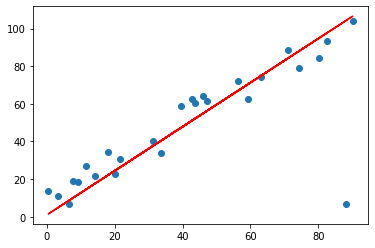

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,o,c='red')

In [ ]:
import numpy as np
xarr=np.array(x)
yarr=np.array(y)
xnew=xarr.reshape(-1,1)
ynew=yarr.reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xnew,ynew)


LinearRegression()

In [ ]:

Prediction=lr.predict(xnew)



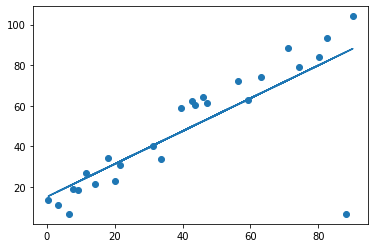

In [ ]:
plt.scatter(x,y)
plt.plot(x,Prediction)

In [ ]:
from sklearn.metrics import r2_score
r2_score(ynew,Prediction)

0.6184368081999585

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,ynew,test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [ ]:
model_output=lr.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest,model_output)

0.8429055747522045

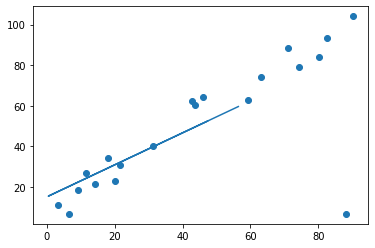

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain)
plt.plot(xtest,model_output)

In [ ]:
import pickle
pickle.dump(lr,open('myweights','wb'))

In [ ]:
abc=pickle.load(open('myweights','rb'))

In [ ]:
abc.predict([[120]])

array([[109.71262006]])

# Day-3

# NURAL NETWORK DISIGNING (diabetes vala)

In [ ]:
import pickle

In [ ]:
from sklearn.datasets import load_diabetes
ld=load_diabetes()


In [ ]:
x=ld.data
y=ld.target
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.2)


In [ ]:
from keras.engine import input_layer
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
model= Sequential()
model.add(Dense(12,activation='relu',input_dim=10))
model.add(Dense(12,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='accuracy',min_delta=0.001,patience=3,mode='auto')

In [ ]:
hs=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=200,callbacks=[es])

Epoch 1/200
12/12 [==============================] - 1s 19ms/step - loss: 27664.5586 - accuracy: 0.0000e+00 - val_loss: 33803.2695 - val_accuracy: 0.0000e+00
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 27558.3145 - accuracy: 0.0000e+00 - val_loss: 33664.6836 - val_accuracy: 0.0000e+00
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 27429.0684 - accuracy: 0.0000e+00 - val_loss: 33501.9844 - val_accuracy: 0.0000e+00
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 27276.7109 - accuracy: 0.0000e+00 - val_loss: 33300.6875 - val_accuracy: 0.0000e+00


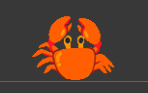

here accuracy is very low toh gya XD

In [ ]:
hs.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

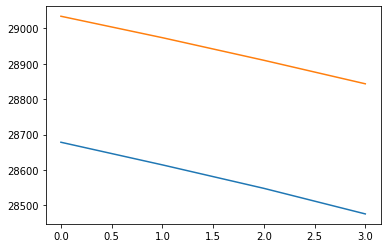

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hs.history['val_loss'])
plt.plot(hs.history['loss'])

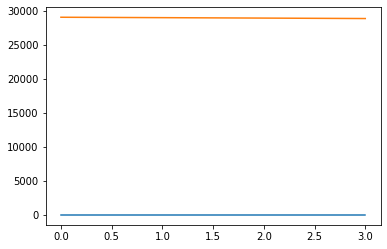

In [ ]:
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['loss'])

**training** -

stocastic(ek ek ka error nikalo fir update kardo)

batch(pure se ek hi bar me)

minibatch(batch bana lo chote chote)


In [ ]:
# model.fit(xtrain,ytrain,epochs=200) 

Epoch 1/200
12/12 [==============================] - 1s 3ms/step - loss: 29812.8281
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 29812.1523
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 29808.8691
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 29797.9980
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 29776.2578
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 29734.4082
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 29675.6465
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 29604.0859
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 29519.4902
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 29414.9062
Epoch 11/200
12/12 [==============================] - 0s 2ms/step - loss: 29285.8477
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 

In [ ]:
ypred=model.predict(xtest)

3/3 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(ypred,ytest)


0.06425662003350185

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving exponential dataset.xlsx to exponential dataset.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel(uploaded['exponential dataset.xlsx'])
x=df['input']
y=df['output']


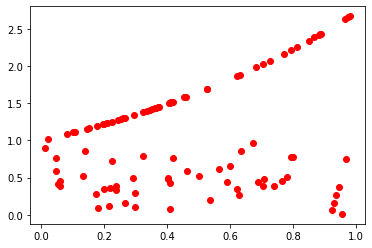

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c='red')

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 1.5708
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.5482
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.5295
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.5119
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4928
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4743
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 1.4564
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4367
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4183
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3997
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3805
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3616
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

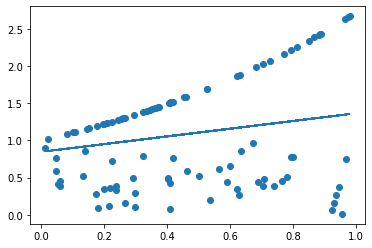

In [ ]:
import numpy as np
xarr=np.array(x)
yarr=np.array(y)
xnew=xarr.reshape(-1,1)
ynew=yarr.reshape(-1,1)
 
from keras.models import Sequential
from keras.layers import Dense
model= Sequential()
model.add(Dense(4,activation='relu',input_dim=1))
model.add(Dense(12,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=200)
ypred=model.predict(x)
plt.scatter(x,y)
plt.plot(x,ypred)



# CNN USING KERAS  ..CLASSIFICATION PROJECT


In [ ]:
from sklearn.datasets import load_iris
li=load_iris()
x=li.data
y=li.target
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x1=scale.fit_transform(x)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#from sklearn.preprocessing import  OneHotEncoder
#enc=OneHotEncoder()
#data3=enc.fit_transform(data2[:,np.newaxis]).toarray()


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y1=ohe.fit_transform(y[:,np.newaxis]).toarray()
y2=y1.astype('int')



In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y2,test_size=0.2)

In [ ]:
#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(x1,y2,test_size=0.2)
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(12,activation='relu',input_dim=4))
model.add(Dense(12,activation='relu'))
model.add(Dense(3,activation='Softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1672
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1396
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1160
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0945
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0748
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0552
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0368
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0200
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0039
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9874
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9719
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9574
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [ ]:
ypred=model.predict(xtest)


1/1 [==============================] - 0s 84ms/step


In [ ]:
for i in range (len(ypred)):
   j=np.argmax(ypred[i,:])
   ypred[i,0]=0
   ypred[i,1]=0
   ypred[i,2]=0
   ypred[i,j]=1

In [ ]:
ypred.astype('int')

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

# Day 4

# DEEP LEARNING & CLASSIFICATION 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score([1,0,0],[1,1,1])

0.3333333333333333

In [ ]:
from sklearn.metrics import precision_score 
precision_score([1,0,0],[1,1,1])
sum=0
for i in range(len(ypred)):
  a= precision_score(ytest[i],ypred[i])
  sum=sum+a
sum=sum/len(ypred)
sum  


0.8666666666666667

In [ ]:
from sklearn.metrics import recall_score 
precision_score([1,0,0],[1,1,1])
sum=0
for i in range(len(ypred)):
  a= precision_score(ytest[i],ypred[i])
  sum=sum+a
sum=sum/len(ypred)
sum  

0.8666666666666667

# **Digit recognition**


In [ ]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

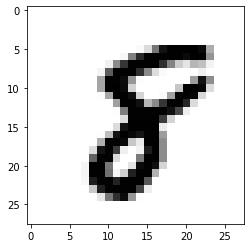

In [ ]:
index=777
import matplotlib.pyplot as plt
plt.imshow(xtrain[index],cmap='Greys')

In [ ]:
ytrain[index]
xtrain[index].shape

(28, 28)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='Softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=100)


Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.7480 - accuracy: 0.3039
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5884 - accuracy: 0.4116
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4172 - accuracy: 0.4805
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2882 - accuracy: 0.5423
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1521 - accuracy: 0.5966
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0409 - accuracy: 0.6498
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9126 - accuracy: 0.7108
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8606 - accuracy: 0.7314
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8245 - accuracy: 0.7405
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - 

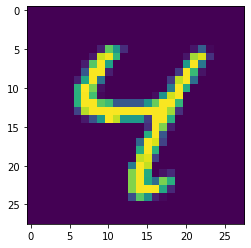

In [ ]:
import numpy as np
a=model.predict=(xtest[2])
j=np.argmax(a)
a=[0,0,0,0,0,0,0,0,0,0,0,0]
a[6]=j

plt.imshow(xtest[6])


In [ ]:
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
xtrain1=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest1=xtest.reshape(xtest.shape[0],28,28,1)
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='Softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')


In [ ]:
model.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2418
Epoch 2/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2073
Epoch 3/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1748
Epoch 4/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1616
Epoch 5/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1626
Epoch 6/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1401
Epoch 7/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1342
Epoch 8/50
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1319
Epoch 9/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1361
Epoch 10/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1344
Epoch 11/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1223
Epoch 12/50
1875/1875 [==============================] - 38s 20

In [ ]:
import numpy as np
xtest[4].shape

(28, 28)

In [ ]:
a=model.predict=(xtest1)


In [ ]:
a

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
a.shape

(10000, 28, 28, 1)

In [ ]:
a[5]
import numpy as np
j=np.argmax(b)
b=[0,0,0,0,0,0,0,0,0]
b[5]=j
b

[0, 0, 0, 0, 0, 0, 0, 0, 0]

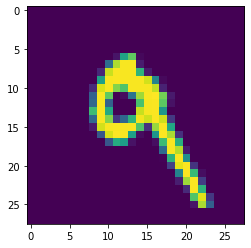

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtest[7])

# Day-5

# OVERFITTING (bagging and boosting)

In [ ]:
from keras import datasets
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer() 
x=dataset.data
y=dataset.target
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
from sklearn.ensemble import BaggingClassifier
BG=BaggingClassifier(base_estimator=model,n_estimators=100,max_features=10,max_samples=100)


In [ ]:
BG.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

BaggingClassifier(base_estimator=LogisticRegression(), max_features=10,
                  max_samples=100, n_estimators=100)

In [ ]:
ypred_test=BG.predict(xtest)
ypred_train=BG.predict(xtrain)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred_test))
print(accuracy_score(ytrain,ypred_train))

0.9473684210526315
0.9494505494505494


In [ ]:
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)
ypred_train=model.predict(xtrain)
print(accuracy_score(ytest,ypred_test))
print(accuracy_score(ytrain,ypred_train))

0.9385964912280702
0.9472527472527472


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K FOLD CROSS VALIDATION

In [ ]:
model=LogisticRegression()
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print(score.mean())

0.9455364073901569


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

# UNSUPERVISED LEARNING (k-mean,elbow)

In [ ]:
#K MEAN CLUSTRIN HOMOGENATING HETEROGENATING

In [ ]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.9)


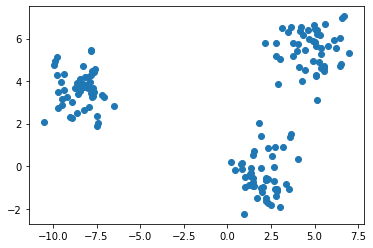

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
K=[1,2,3,4,5,6,7,8,9]
for i in K:
  km=KMeans(n_clusters=i)
  km.fit(x)
  wcss.append(km.inertia_)



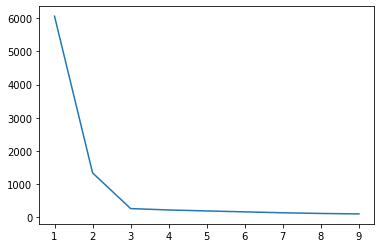

In [ ]:
plt.plot(K,wcss)

In [ ]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(x)
ypred

array([1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 2,
       0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0], dtype=int32)

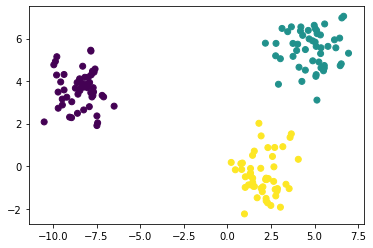

In [ ]:
plt.scatter(x[:,0],x[:,1],c=ypred)

# Day-6

# VGG16

In [ ]:
base='/content/sample_data/flower'
import os
folders=os.listdir(base)
# folders

## open cv -- library (does anything with impages :))

import cv2
x=[]
y=[]
for i in folders:
 for j in os.listdir(base+'/'+i):
   a=j.split('.')
   if(a[1]=='jpg'):
     p=cv2.imread(base+'/'+i+'/'+j)
     r=cv2.resize(p,(224,224))
     x.append(r)
     y.append(i)
     
for i in range(len(y)):
  if y[i]=='rose':
    y[i]=0
  else:
    y[i]=1
# y

import numpy as np
xarr=np.array(x)
yarr=np.array(y)
xarr=xarr/255.0
# xarr.shape


FileNotFoundError: ignored

In [ ]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
# vgg.summary()
vgg.trainable=False
# vgg.summary()

In [ ]:
from keras.layers import Flatten,Dense
from keras.models import Sequential
model=Sequential() #ek ka o/p dooser mai jara doosre ka teesre mai..
model.add(vgg)
#model.summary()
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
# model.summary()
model.compile(optimizer= 'adam',loss="binary_crossentropy",metrics=['accuracy'])
# model.fit(xarr,yarr,epochs=10)

## binary class -sigmoid   -binary_crossentropy
## multi class  -softmax   -catagorical_crossentropy
## regression   -relu      -sparse_catagorical_crossentropy
## one hot me              -catagorical_crossentropy
# resnet 
# gan for fake image generation
# koi bhi sasta sa dataset banana


In [ ]:
a=model.predict=(xarr)
a.shape
# b=a[1]
# import numpy as np
# j=np.argmax(b)
# b=[0,0,0,0,0,0,0,0,0,0]
# b[j]=1
# b
import matplotlib.pyplot as plt
plt.imshow(xarr[2])

# Day-7

# NLP RNN 

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving time.xlsx to time (1).xlsx


In [ ]:
import pandas as pd
df=pd.read_excel(uploaded['time.xlsx'])
data=df['time']
data1=data.tolist()
# multiclass-softmax

In [ ]:
'''def prep_data(data,steps):
  x=[]
  y=[]
  i=0
  while i+steps<len(data):
    x.append(data[i:i+steps])
    y.append(data[i+steps])
    i+=1
  return [x,y]'''   

'''def preparedata(data,steps):
  x=[]
  y=[]
  for i in range(len(data)-steps):
    p=data[i:i+3]
    x.append(p[0:3])
    y.append(p[2])
  return x,y  '''
  
def preparedata(data,steps):
  x=[]
  y=[]
  for i in range(len(data)-steps):
    x.append(data[i:i+3])
    y.append([i+3])
  return x,y  

In [ ]:
x,y=preparedata(data1,3)
import numpy as np
xarr=np.array(x)
yarr=np.array(y)
yarr1=yarr.reshape(-1,1)
yarr1.shape

(7890, 1)

In [ ]:
from keras.layers import Flatten,Dense,LSTM
from keras.models import Sequential
#from keras.losses import sparse_categorical_crossentropy
model=Sequential()
model.add(LSTM(200,activation='relu',return_sequences=True,input_shape=(3,1)))
model.add(Dense(42,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xarr,yarr1,epochs=100)

Epoch 1/100


InvalidArgumentError: ignored

# Sentiment analysis

In [ ]:
sentences=['this is my favourite restaurant','i like to eat burger in this restaurant','food is so spicy not eatable','food is ok']
sentiment=['positive','positive','negative','neutral']


In [ ]:
import nltk # natural language tool kit
nltk.download('punkt')
from nltk.tokenize import word_tokenize
words=[]
for i in sentences:
  p=word_tokenize(i)
  print(p)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['this', 'is', 'my', 'favourite', 'restaurant']
['i', 'like', 'to', 'eat', 'burger', 'in', 'this', 'restaurant']
['food', 'is', 'so', 'spicy', 'not', 'eatable']
['food', 'is', 'ok']


In [ ]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2023-01-10 11:52:48--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.09MB/s    in 2m 40s  

2023-01-10 11:55:28 (5.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [15]:
def add_to_dict(filename,d):
  import numpy as np
  with open(filename,'r') as f:
    for line in f.readlines():
      l=line.split()
      d[l[0]]=np.array(l[1:],dtype='float')
  

In [16]:
dics={}
add_to_dict('glove.6B.50d.txt',dics)

In [ ]:
dics['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

# Day-8



# NLP sentiment analysis hii

In [1]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2023-01-11 06:13:42--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 41s  

2023-01-11 06:16:22 (5.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip

In [75]:
# dataframe from list with the help of pandas
import pandas as pd
data=[['the restaurent is awsome ',1],
      ['the food is so oily and spicy',0],
      ['food is ok',1]]
df=pd.DataFrame(data,columns=['review','sentiment'])
df

,review,sentiment
0,the restaurent is awsome,1
1,the food is so oily and spicy,0
2,food is ok,1


In [12]:
def add_to_dict(filename,d):
  import numpy as np
  with open(filename,'r')as f:
    for line in f.readlines():
      l=line.split(' ')
      d[l[0]]=np.array(l[1:],dtype='float')

In [13]:
words={}
add_to_dict('glove.6B.50d.txt',words)

**paragraph->sentence->words->base form->unused words remove->padding**

In [20]:
import nltk  
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [30]:
from nltk.stem import WordNetLemmatizer
# nltk.word_tokenize("the bzs dhgd z")    ## sentence ko words me
Lemmatizer=WordNetLemmatizer()

In [35]:
# a=['HELLO','HOW',"SGSG"]
# b=[t.lower() for t in a]


['hello', 'how', 'sgsg']

In [47]:
def message_to_tokenslist(s):
  token=nltk.word_tokenize(s)
  lower_case=[t.lower() for t in token]
  lemm=[Lemmatizer.lemmatize(t)  for t in lower_case]
  usefultokens=[t for t in lemm if t in words]
  return usefultokens

In [51]:
message_to_tokenslist('jkdkfhs ndhjhs dhdkfk i sm Very very good')

['i', 'sm', 'very', 'very', 'good']

In [71]:
# word ko vector XD
def message_to_vector(s,words):
  usefultokens=message_to_tokenslist(s)
  vector=[]
  for token in usefultokens:
    if token not in words:
      continue
    q=words[token]
    vector.append(q)
  return np.array(vector,dtype='float')

In [72]:
import numpy as np
a=message_to_vector("hello",words)
# a.shape
# a

In [80]:
def df_to_x_y(df,words):
  y=df['sentiment'].to_numpy().astype('int')
  x=[]
  for message in df['review']:
    message_in_matrix=message_to_vector(message,words)
    x.append(message_in_matrix)
  return x,y

In [88]:
x,y=df_to_x_y(df,words)

In [93]:
from copy import deepcopy
def pad_x(x,length):
  x_copy=[]
  for i in x:
    difference=length-i.shape[0]
    pad=np.zeros(shape=(difference,50))
    x_copy.append(np.concatenate([i,pad]))
  return np.array(x_copy)

In [95]:
xarr=pad_x(x,7)
xarr.shape

(3, 7, 50)

In [99]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Input #dropout ka overfitting hatane ke liye use karte hai
model=Sequential()
model.add(Input(shape=(7,50)))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(64,activation='relu',return_sequences=False))
model.add(Dropout(.2))
model.add(Dense(1,activation='sigmoid')) #binary
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam') #binary
model.fit(xarr,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6979 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6884 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 0.7145 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6735 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6646 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6676 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6549 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6526 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6311 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 1.0000


In [102]:
o=model.predict(xarr)
o>.5

1/1 [==============================] - 0s 83ms/step


array([[ True],
       [False],
       [ True]])